
Name : Saptarshi Mukherjee

In [41]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Display the first few rows to understand the structure
print("Customers Dataset Preview:")
print(customers.head())
print("\nProducts Dataset Preview:")
print(products.head())
print("\nTransactions Dataset Preview:")
print(transactions.head())

Customers Dataset Preview:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset Preview:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset Preview:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54        

In [42]:
# Check data types and null values
print("\nDataset Information:")
print("\nCustomers Info:")
print(customers.info())
print("\nProducts Info:")
print(products.info())
print("\nTransactions Info:")
print(transactions.info())


Dataset Information:

Customers Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Transactions Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Co

In [43]:
# Check for missing values
print("\nMissing Values Summary:")
print("\nCustomers Missing Values:")
print(customers.isnull().sum())
print("\nProducts Missing Values:")
print(products.isnull().sum())
print("\nTransactions Missing Values:")
print(transactions.isnull().sum())


Missing Values Summary:

Customers Missing Values:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Products Missing Values:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Transactions Missing Values:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [44]:
# Descriptive statistics
print("\nDescriptive Statistics:")
print("\nCustomers Statistics:")
print(customers.describe())
print("\nProducts Statistics:")
print(products.describe())
print("\nTransactions Statistics:")
print(transactions.describe())



Descriptive Statistics:

Customers Statistics:
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3

Products Statistics:
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000

Transactions Statistics:
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


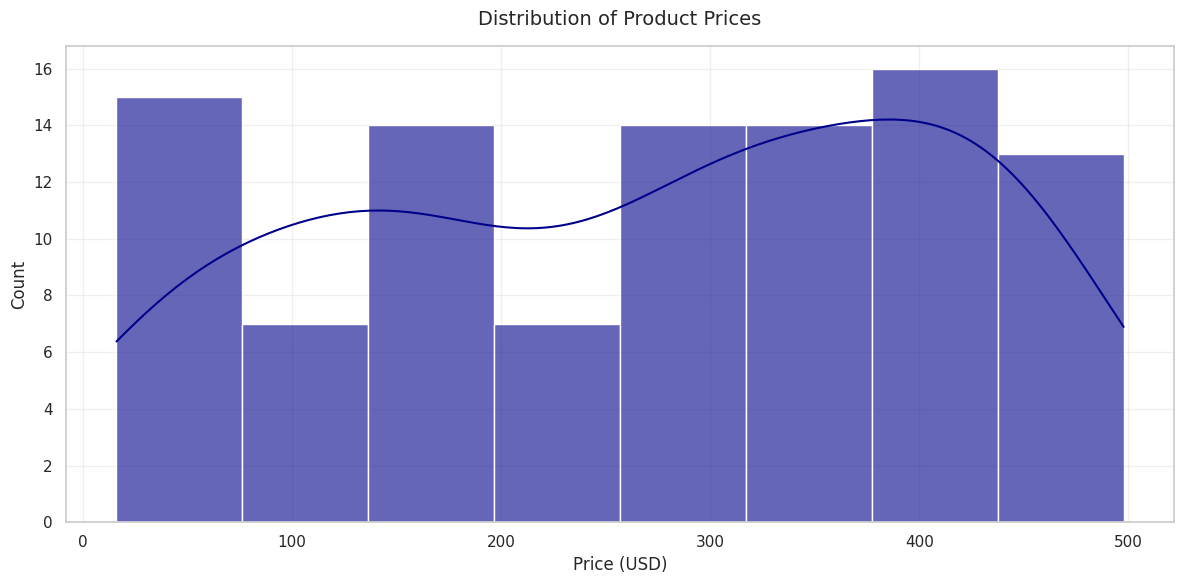

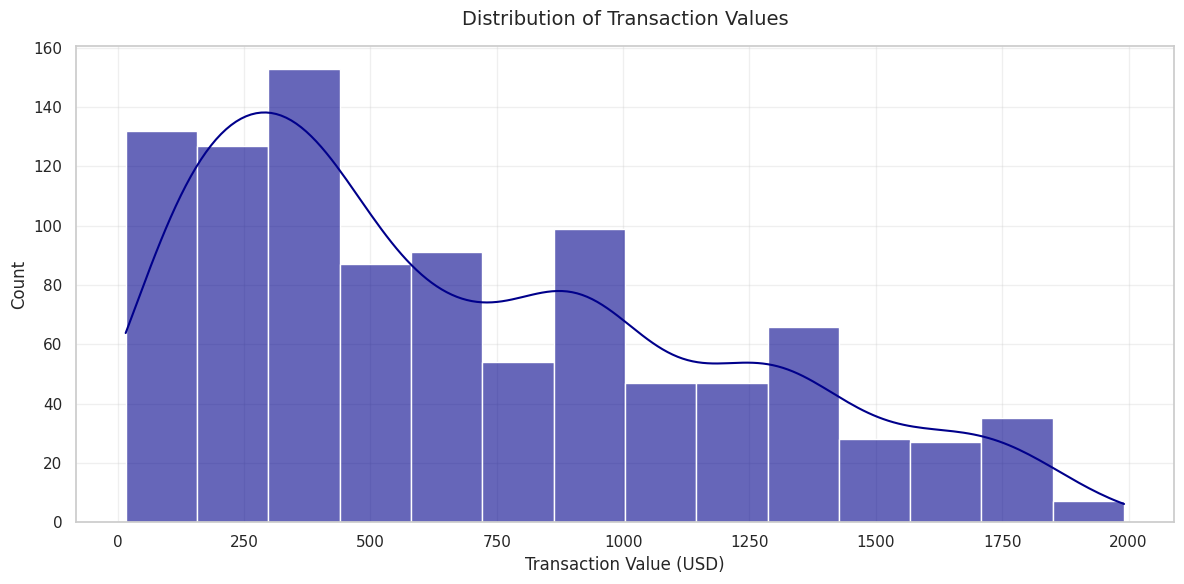

In [45]:
# Set basic style parameters
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
def create_distribution_plot(data, column, title, xlabel):
    plt.figure(figsize=(12, 6))
    sns.histplot(data=data, x=column, kde=True, color='darkblue', alpha=0.6)
    plt.title(title, pad=15)
    plt.xlabel(xlabel)
    plt.ylabel('Count')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
# Product price distribution
create_distribution_plot(products, 'Price',
                        'Distribution of Product Prices',
                        'Price (USD)')

# Transaction value distribution
create_distribution_plot(transactions, 'TotalValue',
                        'Distribution of Transaction Values',
                        'Transaction Value (USD)')

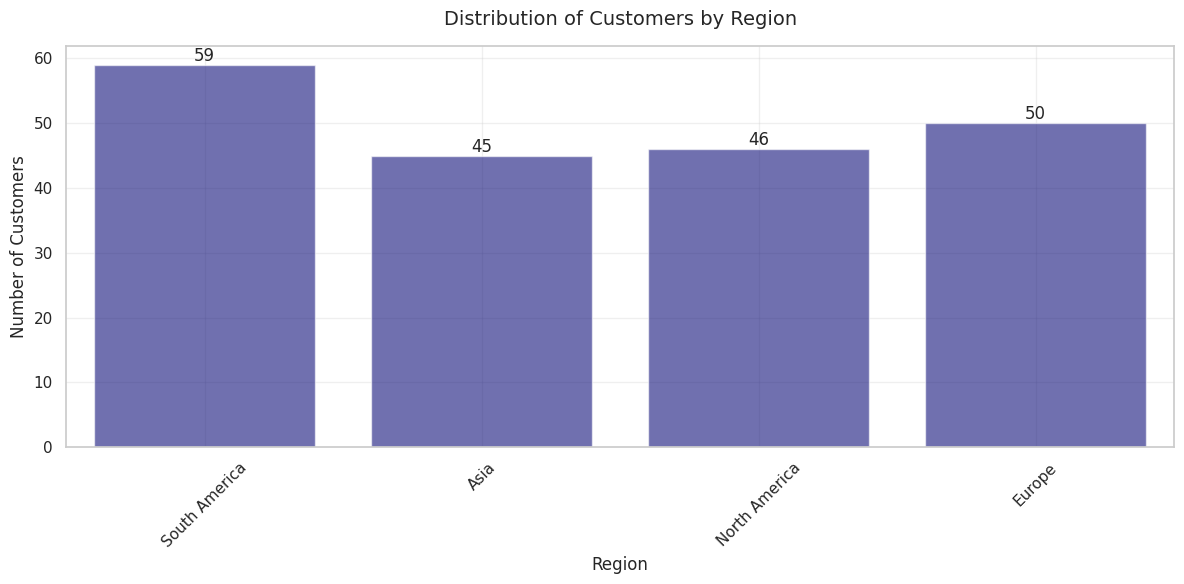

In [46]:
# Customer region distribution
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=customers, x='Region', color='darkblue', alpha=0.6)
plt.title('Distribution of Customers by Region', pad=15)
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
for i in ax.containers:
    ax.bar_label(i)
plt.tight_layout()
plt.show()

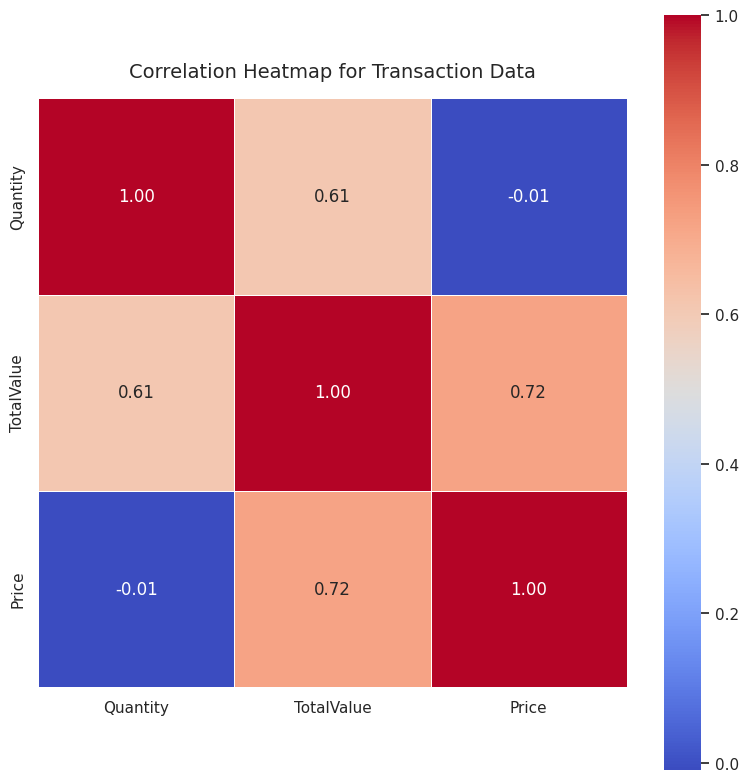

In [47]:
# Correlation heatmap
corr = transactions[['Quantity', 'TotalValue', 'Price']].corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f',
            square=True, linewidths=0.5)
plt.title('Correlation Heatmap for Transaction Data', pad=15)
plt.tight_layout()
plt.show()

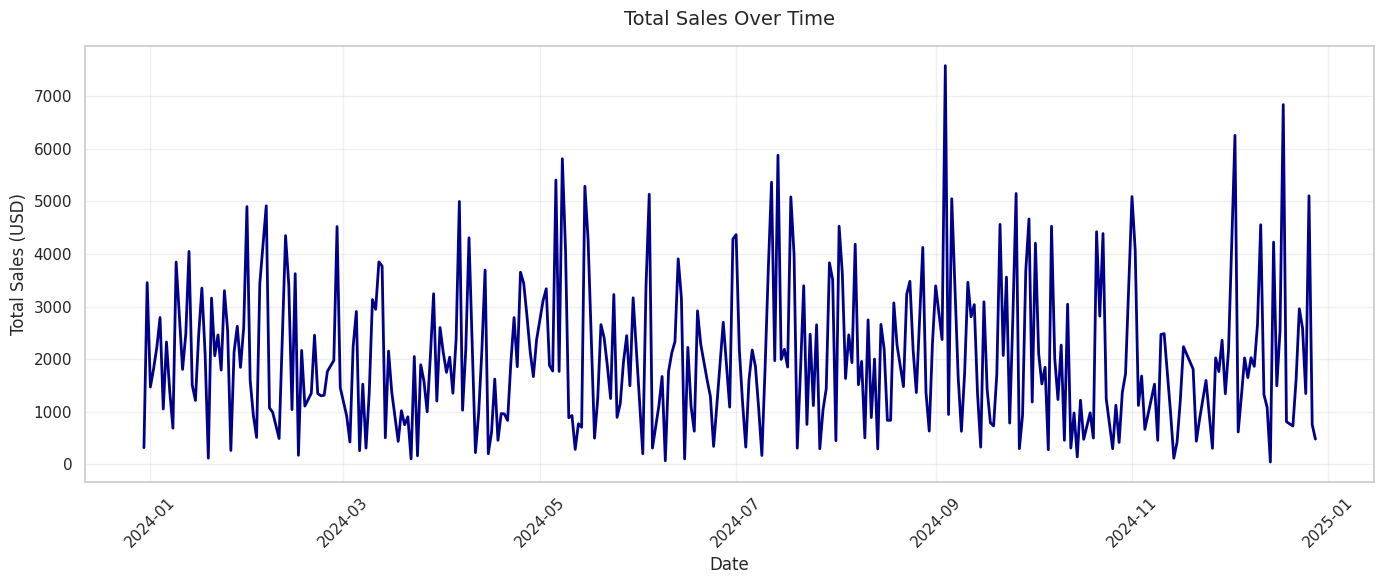

In [48]:
# Sales over time analysis
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Date'] = transactions['TransactionDate'].dt.date
sales_over_time = transactions.groupby('Date')['TotalValue'].sum()

plt.figure(figsize=(14, 6))
plt.plot(sales_over_time.index, sales_over_time.values,
         color='darkblue', linewidth=2)
plt.title('Total Sales Over Time', pad=15)
plt.xlabel('Date')
plt.ylabel('Total Sales (USD)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


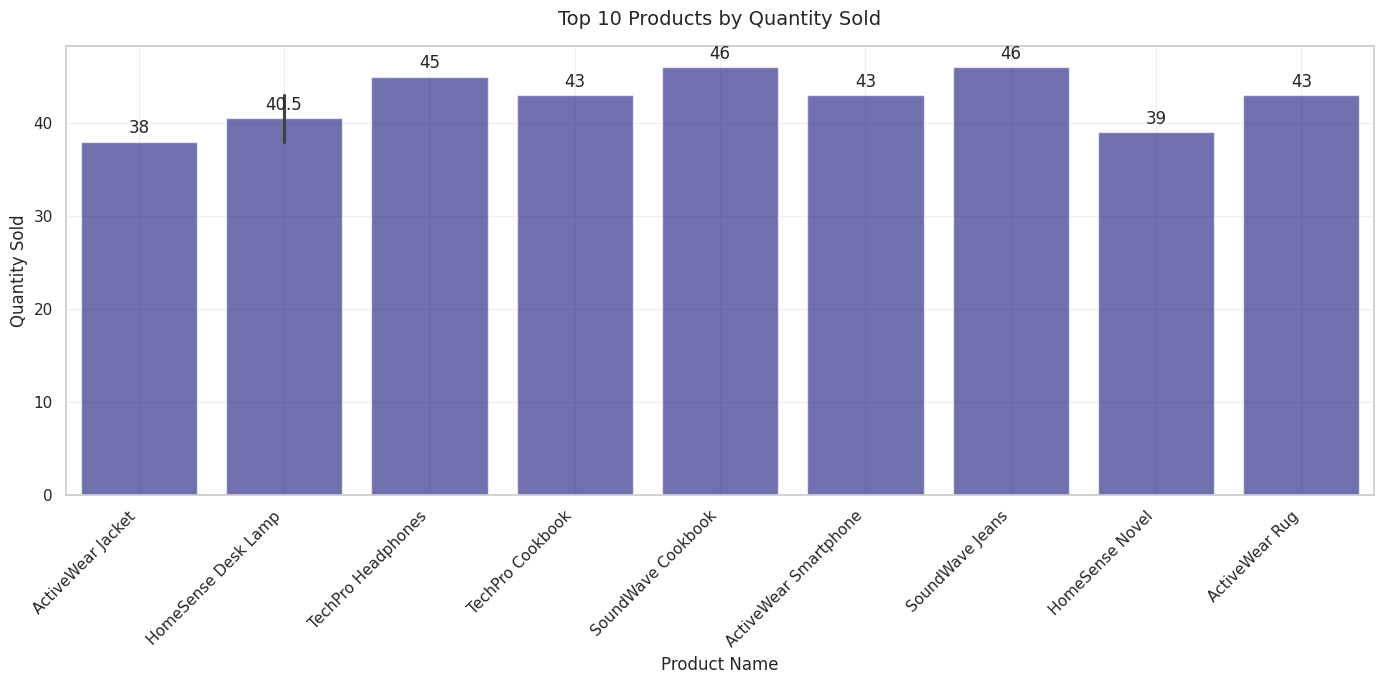

In [49]:
# Top products analysis
product_sales = transactions.groupby('ProductID')['Quantity'].sum()
top_product_ids = product_sales.head(10).index
top_products = products[products['ProductID'].isin(top_product_ids)].copy()  # Using .copy() to avoid warning
top_products['QuantitySold'] = top_products['ProductID'].map(product_sales)

plt.figure(figsize=(14, 7))  # Increased height slightly for better label visibility
ax = sns.barplot(x='ProductName', y='QuantitySold', data=top_products,
                 color='darkblue', alpha=0.6)

plt.title('Top 10 Products by Quantity Sold', pad=15)
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')

# Rotate labels and adjust their position
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.2)  # Adjust bottom margin to prevent label cutoff

# Add value labels on top of each bar
for i in ax.containers:
    ax.bar_label(i, padding=3)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [50]:
# Merge datasets for combined analysis
merged_data = pd.merge(transactions, customers, on='CustomerID', how='left')
merged_data = pd.merge(merged_data, products, on='ProductID', how='left')


print("\nMerged Data Preview:")
print(merged_data.head())

# Calculate and display key metrics
print("\nKey Business Metrics:")
print(f"Total Revenue: ${merged_data['TotalValue'].sum():,.2f}")
print(f"Average Transaction Value: ${merged_data['TotalValue'].mean():,.2f}")
print(f"Total Number of Transactions: {len(merged_data):,}")
print(f"Total Number of Customers: {merged_data['CustomerID'].nunique():,}")
print(f"Total Number of Products: {merged_data['ProductID'].nunique():,}")


Merged Data Preview:
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x        Date     CustomerName         Region  \
0      300.68   300.68  2024-08-25   Andrea Jenkins         Europe   
1      300.68   300.68  2024-05-27  Brittany Harvey           Asia   
2      300.68   300.68  2024-04-25  Kathryn Stevens         Europe   
3      601.36   300.68  2024-03-26  Travis Campbell  South America   
4      902.04   300.68  2024-03-21    Timothy Perez         Europe   

   SignupDate                      ProductName     Category  Price_y  
0  2022-12-03  ComfortLiving Bluetooth Speaker  Electronics   300